In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
df = pd.read_csv('clean_ratios.csv')
df = df.drop(columns=['Unnamed: 0'])
df

,ROI ID,Time [h:m:s],Ratio 340/380
0,2,0:00:00,0.543
1,2,0:00:05,0.543
2,2,0:00:10,0.545
3,2,0:00:15,0.551
4,2,0:00:20,0.542
...,...,...,...
637681,969,0:59:50,0.683
637682,969,0:59:55,0.685
637683,969,1:00:00,0.687
637684,969,1:00:05,0.712


In [3]:
new_cols = df.columns
new_cols

Index(['ROI ID', 'Time [h:m:s]', 'Ratio 340/380'], dtype='object')

In [4]:
ids = df[new_cols[0]].unique()
len(ids)

882

<function matplotlib.pyplot.show(close=None, block=None)>

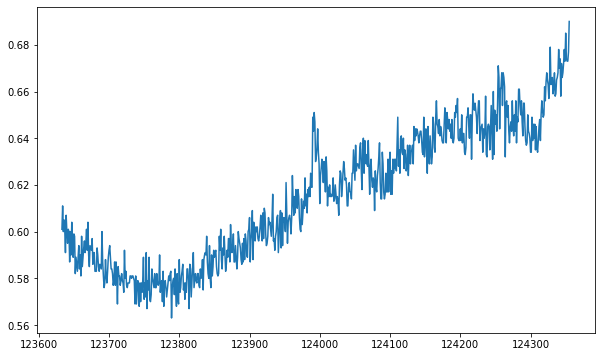

In [5]:
plt.figure(figsize=(10,6))

# for id_ in df[new_cols[0]].unique():
id_n = df[df[new_cols[0]] == ids[171]]
fig = plt.plot(id_n[new_cols[2]])
plt.show

# Let's restructure the df so that each row represents a single cell and each column represents a specific time point (in preparation for dimensionality reduction)

In [8]:
# First, we need to make sure that every cell has the same number of recorded time points

lens = list() # list of number of time points for each cell

for id_ in ids:
    id_n = df[df[new_cols[0]] == id_]
    lens.append(len(id_n))

In [9]:
Counter(lens)

Counter({723: 882})

In [10]:
# Great, all of them are the same length! 723 time points.

In [19]:
# here, we'll create a list of all the time points to use as column names for our new df

time_cols = ['ID'] + list(df[new_cols[1]].unique())
print(len(time_cols))

724


In [32]:
vals_by_cell = list()

for id_ in ids:
    id_n = [id_] + list(df[df[new_cols[0]] == id_][new_cols[2]])
    vals_by_cell.append(id_n)

In [36]:
# here, we create a new df, where each row represents a single cell

cell_df = pd.DataFrame(vals_by_cell, columns = time_cols)

In [37]:
# Et, voila!

cell_df

,ID,0:00:00,0:00:05,0:00:10,0:00:15,0:00:20,0:00:25,0:00:30,0:00:35,0:00:40,...,0:59:25,0:59:30,0:59:35,0:59:40,0:59:45,0:59:50,0:59:55,1:00:00,1:00:05,1:00:10
0,2,0.543,0.543,0.545,0.551,0.542,0.538,0.553,0.537,0.548,...,0.604,0.608,0.591,0.603,0.605,0.598,0.595,0.599,0.605,0.614
1,3,0.618,0.629,0.625,0.624,0.615,0.608,0.630,0.628,0.620,...,0.633,0.646,0.628,0.638,0.647,0.628,0.633,0.628,0.636,0.632
2,4,0.566,0.587,0.576,0.579,0.573,0.577,0.582,0.576,0.577,...,0.570,0.580,0.592,0.609,0.586,0.567,0.572,0.574,0.575,0.576
3,6,0.635,0.646,0.631,0.636,0.631,0.603,0.633,0.632,0.629,...,0.586,0.593,0.589,0.583,0.585,0.612,0.608,0.585,0.613,0.594
4,7,0.626,0.626,0.602,0.612,0.623,0.609,0.626,0.614,0.611,...,0.689,0.670,0.698,0.692,0.713,0.782,0.817,0.796,0.764,0.712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,965,0.578,0.578,0.577,0.571,0.578,0.567,0.588,0.579,0.584,...,0.635,0.628,0.625,0.624,0.631,0.622,0.621,0.616,0.628,0.624
878,966,0.610,0.616,0.605,0.613,0.637,0.592,0.624,0.603,0.617,...,0.601,0.595,0.603,0.585,0.590,0.575,0.582,0.594,0.614,0.596
879,967,0.655,0.673,0.666,0.665,0.659,0.665,0.684,0.675,0.664,...,0.695,0.691,0.693,0.680,0.691,0.683,0.677,0.682,0.687,0.687
880,968,0.483,0.498,0.491,0.488,0.494,0.490,0.508,0.486,0.498,...,0.528,0.524,0.533,0.528,0.561,0.533,0.543,0.537,0.533,0.539


In [139]:
cell_df.to_csv('cell_rows.csv')

In [45]:
# oops, we should not use the ID column in the UMAP

cell_df_no_id = cell_df.drop(columns=['ID'])
cell_df_no_id

,0:00:00,0:00:05,0:00:10,0:00:15,0:00:20,0:00:25,0:00:30,0:00:35,0:00:40,0:00:45,...,0:59:25,0:59:30,0:59:35,0:59:40,0:59:45,0:59:50,0:59:55,1:00:00,1:00:05,1:00:10
0,0.543,0.543,0.545,0.551,0.542,0.538,0.553,0.537,0.548,0.558,...,0.604,0.608,0.591,0.603,0.605,0.598,0.595,0.599,0.605,0.614
1,0.618,0.629,0.625,0.624,0.615,0.608,0.630,0.628,0.620,0.610,...,0.633,0.646,0.628,0.638,0.647,0.628,0.633,0.628,0.636,0.632
2,0.566,0.587,0.576,0.579,0.573,0.577,0.582,0.576,0.577,0.577,...,0.570,0.580,0.592,0.609,0.586,0.567,0.572,0.574,0.575,0.576
3,0.635,0.646,0.631,0.636,0.631,0.603,0.633,0.632,0.629,0.616,...,0.586,0.593,0.589,0.583,0.585,0.612,0.608,0.585,0.613,0.594
4,0.626,0.626,0.602,0.612,0.623,0.609,0.626,0.614,0.611,0.614,...,0.689,0.670,0.698,0.692,0.713,0.782,0.817,0.796,0.764,0.712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,0.578,0.578,0.577,0.571,0.578,0.567,0.588,0.579,0.584,0.578,...,0.635,0.628,0.625,0.624,0.631,0.622,0.621,0.616,0.628,0.624
878,0.610,0.616,0.605,0.613,0.637,0.592,0.624,0.603,0.617,0.618,...,0.601,0.595,0.603,0.585,0.590,0.575,0.582,0.594,0.614,0.596
879,0.655,0.673,0.666,0.665,0.659,0.665,0.684,0.675,0.664,0.665,...,0.695,0.691,0.693,0.680,0.691,0.683,0.677,0.682,0.687,0.687
880,0.483,0.498,0.491,0.488,0.494,0.490,0.508,0.486,0.498,0.499,...,0.528,0.524,0.533,0.528,0.561,0.533,0.543,0.537,0.533,0.539


# Let's see what we find in the UMAP space

In [38]:
from umap.umap_ import UMAP

In [46]:
reducer = UMAP(n_neighbors=15, # default 15, The size of local neighborhood (in terms of number of neighboring sample points) used for manifold approximation.
               n_components=2, # default 2, The dimension of the space to embed into.
               metric='euclidean', # default 'euclidean', The metric to use to compute distances in high dimensional space.
               n_epochs=100, # default None, The number of training epochs to be used in optimizing the low dimensional embedding. Larger values result in more accurate embeddings. 
               learning_rate=1.0, # default 1.0, The initial learning rate for the embedding optimization.
               init='spectral', # default 'spectral', How to initialize the low dimensional embedding. Options are: {'spectral', 'random', A numpy array of initial embedding positions}.
               min_dist=0.05, # default 0.1, The effective minimum distance between embedded points.
               spread=1.0, # default 1.0, The effective scale of embedded points. In combination with ``min_dist`` this determines how clustered/clumped the embedded points are.
               low_memory=False, # default False, For some datasets the nearest neighbor computation can consume a lot of memory. If you find that UMAP is failing due to memory constraints consider setting this option to True.
               set_op_mix_ratio=1.0, # default 1.0, The value of this parameter should be between 0.0 and 1.0; a value of 1.0 will use a pure fuzzy union, while 0.0 will use a pure fuzzy intersection.
               local_connectivity=1, # default 1, The local connectivity required -- i.e. the number of nearest neighbors that should be assumed to be connected at a local level.
               repulsion_strength=1.0, # default 1.0, Weighting applied to negative samples in low dimensional embedding optimization.
               negative_sample_rate=5, # default 5, Increasing this value will result in greater repulsive force being applied, greater optimization cost, but slightly more accuracy.
               transform_queue_size=4.0, # default 4.0, Larger values will result in slower performance but more accurate nearest neighbor evaluation.
               a=None, # default None, More specific parameters controlling the embedding. If None these values are set automatically as determined by ``min_dist`` and ``spread``.
               b=None, # default None, More specific parameters controlling the embedding. If None these values are set automatically as determined by ``min_dist`` and ``spread``.
               random_state=42, # default: None, If int, random_state is the seed used by the random number generator;
               metric_kwds=None, # default None) Arguments to pass on to the metric, such as the ``p`` value for Minkowski distance.
               angular_rp_forest=False, # default False, Whether to use an angular random projection forest to initialise the approximate nearest neighbor search.
               target_n_neighbors=-1, # default -1, The number of nearest neighbors to use to construct the target simplcial set. If set to -1 use the ``n_neighbors`` value.
               #target_metric='categorical', # default 'categorical', The metric used to measure distance for a target array is using supervised dimension reduction. By default this is 'categorical' which will measure distance in terms of whether categories match or are different. 
               #target_metric_kwds=None, # dict, default None, Keyword argument to pass to the target metric when performing supervised dimension reduction. If None then no arguments are passed on.
               #target_weight=0.5, # default 0.5, weighting factor between data topology and target topology.
               transform_seed=42, # default 42, Random seed used for the stochastic aspects of the transform operation.
               verbose=False, # default False, Controls verbosity of logging.
               unique=False, # default False, Controls if the rows of your data should be uniqued before being embedded. 
              )

data_reduced = reducer.fit_transform(cell_df_no_id)
data_reduced.shape
reduced_df = pd.DataFrame(data_reduced)

(882, 2)

<AxesSubplot:xlabel='0', ylabel='1'>

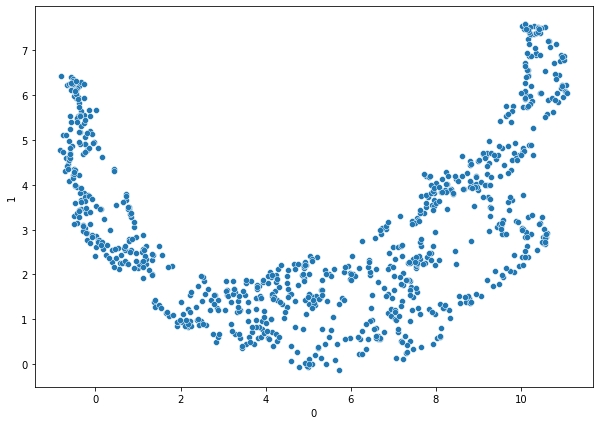

In [49]:
plt.figure(figsize=(10,7))
# set axes
x = reduced_df[0]
y = reduced_df[1]

sns.scatterplot(x=x, y=y)

# Looks like there are potentially several poorly formed clusters, let's see what DBSCAN finds

In [50]:
from sklearn.cluster import DBSCAN

In [66]:
db = DBSCAN(eps=.391, min_samples=1).fit(reduced_df)
labels = db.labels_
# print(labels)
print(set(labels))
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

print(Counter(labels))

{0, 1, 2, 3, 4}
5
Counter({1: 567, 2: 219, 0: 93, 3: 2, 4: 1})


Text(1, 4.5, 'Cluster 2')

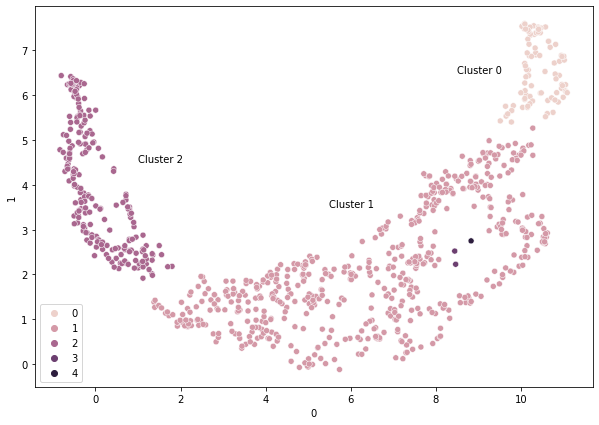

In [142]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=x, y=y, hue=labels)
plt.annotate('Cluster 0', xy=(8.5,6.5))
plt.annotate('Cluster 1', xy=(5.5,3.5))
plt.annotate('Cluster 2', xy=(1,4.5))

# Okay, great, let's look closer at clusters 0, 1, and 2. Clusters 3 and 4 may not be significant.

In [121]:
labels[:25]

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2,
       2, 1, 2])

Text(0.5, 51.0, 'Time')

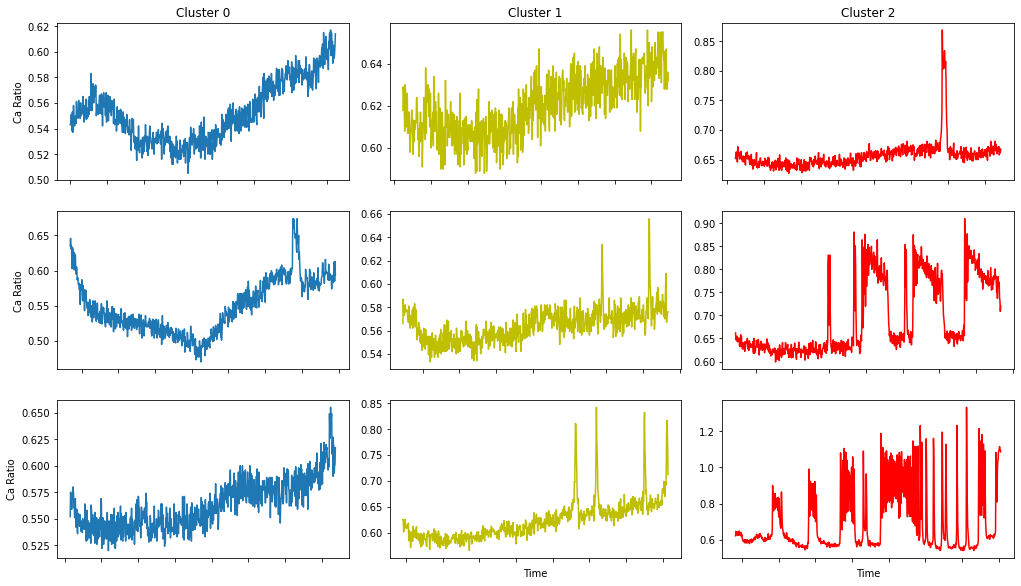

In [138]:
# Let's look at several from group 0: 0, 3, 5 
# and several from group 1: 1, 2, and 4
# and several from group 2: 14, 15, 21

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(14,8))
fig.tight_layout(pad=1)

id_0 = df[df[new_cols[0]] == ids[0]]
ax[0,0].plot(id_0[new_cols[2]])
ax[0,0].xaxis.set_ticklabels([])
ax[0,0].set_ylabel('Ca Ratio')
ax[0,0].set_title('Cluster 0')

id_3 = df[df[new_cols[0]] == ids[3]]
ax[1,0].plot(id_3[new_cols[2]])
ax[1,0].xaxis.set_ticklabels([])
ax[1,0].set_ylabel('Ca Ratio')

id_5 = df[df[new_cols[0]] == ids[5]]
ax[2,0].plot(id_5[new_cols[2]])
ax[2,0].xaxis.set_ticklabels([])
ax[2,0].set_ylabel('Ca Ratio')
ax[2,1].set_xlabel('Time')

id_1 = df[df[new_cols[0]] == ids[1]]
ax[0,1].plot(id_1[new_cols[2]], color="y")
ax[0,1].xaxis.set_ticklabels([])
ax[0,1].set_title('Cluster 1')

id_2 = df[df[new_cols[0]] == ids[2]]
ax[1,1].plot(id_2[new_cols[2]], color="y")
ax[1,1].xaxis.set_ticklabels([])

id_4 = df[df[new_cols[0]] == ids[4]]
ax[2,1].plot(id_4[new_cols[2]], color="y")
ax[2,1].xaxis.set_ticklabels([])
ax[2,1].set_xlabel('Time')

id_14 = df[df[new_cols[0]] == ids[14]]
ax[0,2].plot(id_14[new_cols[2]], color="r")
ax[0,2].xaxis.set_ticklabels([])
ax[0,2].set_title('Cluster 2')

id_15 = df[df[new_cols[0]] == ids[15]]
ax[1,2].plot(id_15[new_cols[2]], color="r")
ax[1,2].xaxis.set_ticklabels([])

id_21 = df[df[new_cols[0]] == ids[21]]
ax[2,2].plot(id_21[new_cols[2]], color="r")
ax[2,2].xaxis.set_ticklabels([])
ax[2,2].set_xlabel('Time')